<div class="alert alert-block alert-success">
    <h3 align="center">Churn Modelling</h3>
    <h4 align="center">Alireza Javid</h4>
</div>

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build some models to predict the churn and use precision,recall, f1-score to measure performance of our model.

### We will go through project like this:
<h3 style='color:blue'>Handle imbalanced data in churn prediction.</h3>


1. Import Library
2. Load Data
3. EDA
4. Visulization
5. Preprocessing (Encoding , Scaling , Imputation)
6. Training the model
7. Evaluation

# 1. Import Libraries

In [1]:
import joblib
import sklearn
import warnings

import numpy as np
import pandas as pd

import plotly.express as px

from sklearn import svm, tree

from sklearn.metrics import classification_report
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression, SGDClassifier

from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
sklearn.__version__

'1.2.2'

## 2. Load data and make dataframe

In [3]:
df = pd.read_csv("/kaggle/input/customer-churn/IT_customer_churn.csv")
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6171,Female,1,Yes,Yes,59,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),88.75,5348.65,No
6916,Male,0,No,Yes,44,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.55,819.95,No
5073,Female,0,No,Yes,22,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),49.45,1031.4,No
5936,Female,0,Yes,Yes,38,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.95,756.4,No
690,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# 3. Do Some EDA

In [8]:
df.isnull().sum().sum()

0

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

**Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with  this column**
**Lets convert it to numbers**

**Remove rows with space in TotalCharges**

In [10]:
df1 = df[df["TotalCharges"]!=" "]

In [11]:
df.shape

(7043, 20)

In [12]:
df1.shape

(7032, 20)

In [13]:
pd.to_numeric(df1.TotalCharges,errors='coerce').isnull().sum()

0

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [15]:
type(df1)

pandas.core.frame.DataFrame

In [16]:
df1.shape

(7032, 20)

In [17]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# 4. Let's do some  Visualization

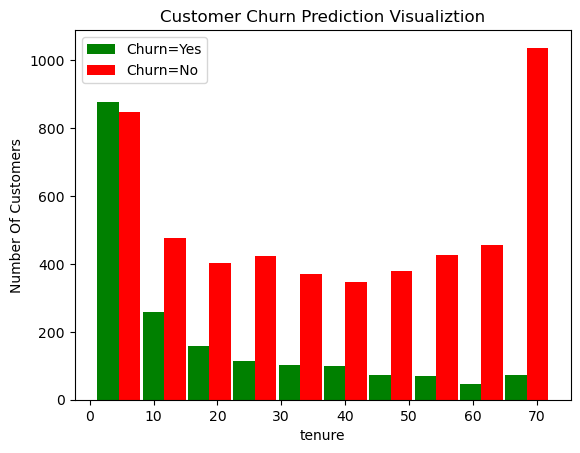

In [18]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


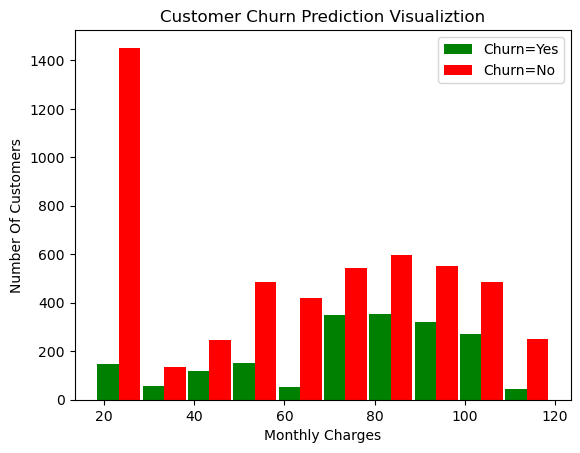

In [19]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

# 5. Data Preprocessing

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [20]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [21]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [22]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)

In [23]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


**Convert Yes and No to 1 or 0**

In [24]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [25]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


**One hot encoding for categorical columns**

In [26]:
df1['gender'].replace({'Male': 1,'Female': 0},inplace=True)

In [27]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [28]:
df1 = pd.get_dummies(df1,['Contract','PaymentMethod','InternetService'])

In [29]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_DSL,Contract_Fiber optic,Contract_No,PaymentMethod_Month-to-month,PaymentMethod_One year,PaymentMethod_Two year,InternetService_Bank transfer (automatic),InternetService_Credit card (automatic),InternetService_Electronic check,InternetService_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [30]:
df1[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


**Scaling**

In [31]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_DSL', 'Contract_Fiber optic', 'Contract_No',
       'PaymentMethod_Month-to-month', 'PaymentMethod_One year',
       'PaymentMethod_Two year', 'InternetService_Bank transfer (automatic)',
       'InternetService_Credit card (automatic)',
       'InternetService_Electronic check', 'InternetService_Mailed check'],
      dtype='object')

In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])


In [33]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

## Train test split

In [34]:
X = df1.drop('Churn',axis='columns')
y = df1.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [35]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [36]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [37]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [38]:
X_train.shape

(5625, 26)

In [39]:
X_test.shape

(1407, 26)

In [40]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_DSL,Contract_Fiber optic,Contract_No,PaymentMethod_Month-to-month,PaymentMethod_One year,PaymentMethod_Two year,InternetService_Bank transfer (automatic),InternetService_Credit card (automatic),InternetService_Electronic check,InternetService_Mailed check
684,0,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,0,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,1,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,1,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,0,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,0,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,1,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,0,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,1,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [41]:
len(X_train.columns)

26

# 6&7 .Train the model
**Use logistic regression classifier**

In [42]:
def log_reg(X_train, y_train, X_test, y_test, weights):
    if weights==-1:
        model = LogisticRegression()
    else:
        model = LogisticRegression(class_weight={0:weights[0], 1:weights[1]})

    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Accuracy", acc, "\n")

    y_pred = model.predict(X_test)
    print("preds", y_pred[:5], "\n")

    cl_rep = classification_report(y_test,y_pred)
    print(cl_rep)

* weight means you are giving more importance to a particular class.

In [43]:
weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.8031272210376688 

preds [0. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1033
         1.0       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [44]:
weights = [1, 1.5] # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7938877043354655 

preds [0. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86      1033
         1.0       0.60      0.68      0.64       374

    accuracy                           0.79      1407
   macro avg       0.74      0.76      0.75      1407
weighted avg       0.80      0.79      0.80      1407



* when we don't define class weights we get 0.66 precision and 0.54 recall.
* when we define class weights we get 0.50 precision and 0.79 recall.

# "Imbalanced dataset"

### Method1: Undersampling

In [45]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]

In [46]:
count_class_0

5163

In [47]:
count_class_1

1869

In [48]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [49]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [50]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

#### Applying Logistic Regression

In [51]:
weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7446524064171123 

preds [0 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       374
           1       0.73      0.78      0.75       374

    accuracy                           0.74       748
   macro avg       0.75      0.74      0.74       748
weighted avg       0.75      0.74      0.74       748



<h4 style='color:blue'>With undersampling: f1 score for minority class 1 improved to be 0.75 from 0.59</h4>

#### Applying SVM

In [52]:
clf = svm.SVC()
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print("Accuracy", acc, "\n")

y_pred = clf.predict(X_test)
print("preds", y_pred[:5], "\n")

cl_rep = classification_report(y_test,y_pred)
print(cl_rep)

Accuracy 0.7486631016042781 

preds [0 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       374
           1       0.73      0.79      0.76       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



#### Applying SGDClassifier

In [53]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print("Accuracy", acc, "\n")

y_pred = clf.predict(X_test)
print("preds", y_pred[:5], "\n")

cl_rep = classification_report(y_test,y_pred)
print(cl_rep)

Accuracy 0.5548128342245989 

preds [0 0 0 0 0] 

              precision    recall  f1-score   support

           0       0.53      0.98      0.69       374
           1       0.89      0.13      0.22       374

    accuracy                           0.55       748
   macro avg       0.71      0.55      0.45       748
weighted avg       0.71      0.55      0.45       748



#### Applying NearestCentroid

In [54]:
clf = NearestCentroid()
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print("Accuracy", acc, "\n")

y_pred = clf.predict(X_test)
print("preds", y_pred[:5], "\n")

cl_rep = classification_report(y_test,y_pred)
print(cl_rep)

Accuracy 0.7446524064171123 

preds [1 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       374
           1       0.73      0.77      0.75       374

    accuracy                           0.74       748
   macro avg       0.75      0.74      0.74       748
weighted avg       0.75      0.74      0.74       748



#### Applying Decision Trees

In [55]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print("Accuracy", acc, "\n")

y_pred = clf.predict(X_test)
print("preds", y_pred[:5], "\n")

cl_rep = classification_report(y_test,y_pred)
print(cl_rep)

Accuracy 0.6764705882352942 

preds [0 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       374
           1       0.67      0.69      0.68       374

    accuracy                           0.68       748
   macro avg       0.68      0.68      0.68       748
weighted avg       0.68      0.68      0.68       748



### Method2: Oversampling

In [56]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [57]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [58]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

#### Logistic Regression

In [59]:
weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7579864472410455 

preds [1 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1033
           1       0.74      0.80      0.77      1033

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



<h4 style='color:blue'>With oversampling: f1 score for minority class 1 improved to be 0.76 from 0.59</h4>

#### Applying SVM

In [60]:
clf = svm.SVC()
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print("Accuracy", acc, "\n")

y_pred = clf.predict(X_test)
print("preds", y_pred[:5], "\n")

cl_rep = classification_report(y_test,y_pred)
print(cl_rep)

Accuracy 0.7783155856727977 

preds [1 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1033
           1       0.76      0.82      0.79      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



#### Applying SGDClassifier

In [61]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print("Accuracy", acc, "\n")

y_pred = clf.predict(X_test)
print("preds", y_pred[:5], "\n")

cl_rep = classification_report(y_test,y_pred)
print(cl_rep)

Accuracy 0.7366892545982575 

preds [1 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.80      0.63      0.71      1033
           1       0.70      0.84      0.76      1033

    accuracy                           0.74      2066
   macro avg       0.75      0.74      0.73      2066
weighted avg       0.75      0.74      0.73      2066



#### Applying NearestCentroid

In [62]:
clf = NearestCentroid()
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print("Accuracy", acc, "\n")

y_pred = clf.predict(X_test)
print("preds", y_pred[:5], "\n")

cl_rep = classification_report(y_test,y_pred)
print(cl_rep)

Accuracy 0.7512100677637947 

preds [1 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1033
           1       0.74      0.77      0.76      1033

    accuracy                           0.75      2066
   macro avg       0.75      0.75      0.75      2066
weighted avg       0.75      0.75      0.75      2066



#### Applying Decision Trees

In [63]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print("Accuracy", acc, "\n")

y_pred = clf.predict(X_test)
print("preds", y_pred[:5], "\n")

cl_rep = classification_report(y_test,y_pred)
print(cl_rep)

Accuracy 0.8712487899322362 

preds [1 0 1 0 1] 

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1033
           1       0.83      0.94      0.88      1033

    accuracy                           0.87      2066
   macro avg       0.88      0.87      0.87      2066
weighted avg       0.88      0.87      0.87      2066



In [64]:
# clf

In [65]:
# joblib.dump(clf, 'DecisionTreeClassifier.joblib')

In [66]:
# # load the model from disk
# loaded_model = joblib.load('DecisionTreeClassifier.joblib')
# # fit_model = loaded_model.fit(X_train, y_train)
# result = loaded_model.score(X_test, y_test)
# print(result)

### Method3: SMOTE

To install imbalanced-learn library use "pip install imbalanced-learn" command

In [67]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [68]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [70]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

## Final results: Logistic Regression

In [71]:
weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7967086156824782 

preds [1 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1033
           1       0.78      0.82      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



<h4 style='color:blue'>With SMOTE oversampling: f1 score for minority class 1 improved to be 0.81 from 0.59</h4>

#### Applying SVM

In [72]:
clf = svm.SVC()
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print("Accuracy", acc, "\n")

y_pred = clf.predict(X_test)
print("preds", y_pred[:5], "\n")

cl_rep = classification_report(y_test,y_pred)
print(cl_rep)

Accuracy 0.7928363988383349 

preds [1 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1033
           1       0.78      0.82      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



#### Applying SGDClassifier

In [73]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print("Accuracy", acc, "\n")

y_pred = clf.predict(X_test)
print("preds", y_pred[:5], "\n")

cl_rep = classification_report(y_test,y_pred)
print(cl_rep)

Accuracy 0.7671829622458858 

preds [1 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1033
           1       0.72      0.87      0.79      1033

    accuracy                           0.77      2066
   macro avg       0.78      0.77      0.76      2066
weighted avg       0.78      0.77      0.76      2066



#### Applying NearestCentroid

In [74]:
clf = NearestCentroid()
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print("Accuracy", acc, "\n")

y_pred = clf.predict(X_test)
print("preds", y_pred[:5], "\n")

cl_rep = classification_report(y_test,y_pred)
print(cl_rep)

Accuracy 0.7700871248789932 

preds [1 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1033
           1       0.75      0.80      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



#### Applying Decision Trees

In [75]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print("Accuracy", acc, "\n")

y_pred = clf.predict(X_test)
print("preds", y_pred[:5], "\n")

cl_rep = classification_report(y_test,y_pred)
print(cl_rep)

Accuracy 0.7700871248789932 

preds [1 0 0 1 0] 

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1033
           1       0.76      0.79      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

